In [1]:
using DataFrames

using Plots
using JLD

using Distributions
using StatsBase
using Iterators
using EmpiricalBayes
using StatPlots

using LaTeXStrings

In [2]:
settings = 19
k_max=16
nreps = 25
nreps_total = k_max*nreps
nmethods=3

3

In [3]:
marginal_grid = collect(linspace(-6,6,1001));
prior_grid = collect(linspace(-3,3,121));
marginal_h = marginal_grid[2]-marginal_grid[1];

true_dist = MixtureModel([ Normal(-0.3,.2), Normal(0,0.9)],[0.8, 0.2])
d_true = NormalConvolutionProblem(true_dist, marginal_grid)

EmpiricalBayes.NormalConvolutionProblem(MixtureModel{Distributions.Normal{Float64}}(K = 2)
components[1] (prior = 0.8000): Distributions.Normal{Float64}(μ=-0.3, σ=0.2)
components[2] (prior = 0.2000): Distributions.Normal{Float64}(μ=0.0, σ=0.9)
, [3.47655e-8, 3.61918e-8, 3.7674e-8, 3.92142e-8, 4.08146e-8, 4.24775e-8, 4.42051e-8, 4.59998e-8, 4.78642e-8, 4.98009e-8  …  4.87273e-8, 4.68575e-8, 4.5056e-8, 4.33203e-8, 4.16482e-8, 4.00375e-8, 3.8486e-8, 3.69917e-8, 3.55527e-8, 3.41669e-8], [-6.0, -5.988, -5.976, -5.964, -5.952, -5.94, -5.928, -5.916, -5.904, -5.892  …  5.892, 5.904, 5.916, 5.928, 5.94, 5.952, 5.964, 5.976, 5.988, 6.0], 0.011999999999999567)

In [4]:
Base.getindex(t::EmpiricalBayes.BradDeconvolveR, ::Int64) = t
methods = ["CEB"; "G0"; "G"]
maxbias(t::EmpiricalBayes.BradDeconvolveR) = 0.0;
maxbias(t::DonohoCI) = t.max_bias;


In [41]:
maxbias

maxbias (generic function with 2 methods)

In [10]:
res_df = DataFrame(truetheta=Float64[], 
    x=Float64[], m=Int64[],
    σ=Float64[], 
    bias=Float64[], 
    coverage=Float64[], 
    width=Float64[],
    se=Float64[],
    maxbias=Float64[],
    lowerband=Float64[],
    upperband=Float64[],
    method = String[]
)

for comb=4:16
    @show comb
    for nmethod=1:3
    @show nmethod
    cnt = one(Int)

    point_est = Vector{Float64}(nreps_total)
    bias_calib = Vector{Float64}(nreps_total)
    coverage_calib = Vector{Bool}(nreps_total)
    width_calib = Vector{Float64}(nreps_total)
    maxbias_calib = Vector{Float64}(nreps_total)
    se_calib = Vector{Float64}(nreps_total)

    lower_band_vec = Vector{Float64}(nreps_total)
    upper_band_vec = Vector{Float64}(nreps_total)

    x=0.0
    m=10
    σ=1.0
    true_θ = 0.0 
        
    method_name = methods[nmethod]

    for sim_batch=1:k_max
    
        sim = load("May21b/May21b/mysim_$(comb)_$(sim_batch).jld")["res"]
    
            
        x = sim[2][:x]
        m = sim[2][:m]
        σ = sim[2][:σ]

        sim = sim[3]

        target = PosteriorTarget(PosteriorMeanNumerator(x))

        true_num, true_denom, true_θ = posterior_stats(d_true, target)

  
        for k=1:nreps
            donoho_res = sim[k][nmethod][1]
            l,r = confint(donoho_res, target) 
            point_est[cnt] = estimate(donoho_res, target)
            bias_calib[cnt] = estimate(donoho_res, target) - true_θ
            coverage_calib[cnt] = r >= true_θ >= l
            width_calib[cnt] = r-l
            maxbias_calib[cnt] = maxbias(donoho_res)
                
            lower_band_vec[cnt] = l
            upper_band_vec[cnt] = r
            cnt +=1
        end
    end

    bias_calib = mean(bias_calib)
    coverage_calib = mean(coverage_calib)
    width_calib = mean(width_calib)
    se_res = std(point_est)
    maxb = mean(maxbias_calib)
    lower_band = mean(lower_band_vec)
    upper_band = mean(upper_band_vec)
        
    push!(res_df, (true_θ, x, m, σ, bias_calib, coverage_calib, width_calib, se_res, 
                 maxb, lower_band, upper_band, method_name))
    end
end

#res_df[:σ] = string.(res_df[:σ]);
head(res_df)

comb = 4
nmethod = 1
nmethod = 2
nmethod = 3
comb = 5
nmethod = 1
nmethod = 2
nmethod = 3
comb = 6
nmethod = 1
nmethod = 2
nmethod = 3
comb = 7
nmethod = 1
nmethod = 2
nmethod = 3
comb = 8
nmethod = 1
nmethod = 2
nmethod = 3
comb = 9
nmethod = 1
nmethod = 2
nmethod = 3
comb = 10
nmethod = 1
nmethod = 2
nmethod = 3
comb = 11
nmethod = 1
nmethod = 2
nmethod = 3
comb = 12
nmethod = 1
nmethod = 2
nmethod = 3
comb = 13
nmethod = 1
nmethod = 2
nmethod = 3
comb = 14
nmethod = 1
nmethod = 2
nmethod = 3
comb = 15
nmethod = 1
nmethod = 2
nmethod = 3
comb = 16
nmethod = 1
nmethod = 2
nmethod = 3


,truetheta,x,m,σ,bias,coverage,width,se,maxbias,lowerband,upperband,method
1,-0.726925,-3.0,20000,0.2,-0.0217426,0.915,0.431975,0.128934,0.0628175,-0.964655,-0.53268,CEB
2,-0.726925,-3.0,20000,0.2,-0.0306787,0.95,0.145297,0.0242857,0.0,-0.830252,-0.684955,G0
3,-0.726925,-3.0,20000,0.2,0.00203017,0.9475,0.110197,0.0514253,0.0,-0.779994,-0.669796,G
4,-0.573111,-2.5,20000,0.2,-0.0181581,0.9275,0.231728,0.063064,0.0363659,-0.707134,-0.475405,CEB
5,-0.573111,-2.5,20000,0.2,-0.0440215,0.575,0.0909516,0.0132548,0.0,-0.662609,-0.571657,G0
6,-0.573111,-2.5,20000,0.2,-0.0354569,0.82,0.0656106,0.0820268,0.0,-0.641374,-0.575763,G


In [17]:
tst = unstack(res_df, [:x, :m,], :method, :se)

,x,m,CEB,G,G0
1,-3.0,20000,0.128934,0.0514253,0.0242857
2,-2.5,20000,0.063064,0.0820268,0.0132548
3,-2.0,20000,0.0331986,0.119553,0.00940581
4,-1.5,20000,0.0218878,0.204542,0.00942484
5,-1.0,20000,0.0156553,0.230209,0.0088807
6,-0.5,20000,0.0138334,0.164828,0.00826869
7,0.0,20000,0.0134668,0.132559,0.00819675
8,0.5,20000,0.0188591,0.211125,0.00767508
9,1.0,20000,0.0225015,0.198501,0.0101957
10,1.5,20000,0.0376052,0.141544,0.0178317


In [15]:
size(tst), size(res_df)

((13, 5), (39, 12))

In [19]:
res_df_tmp = res_df[res_df[:method] .=="CEB",:]

,truetheta,x,m,σ,bias,coverage,width,se,maxbias,lowerband,upperband,method
1,-0.726925,-3.0,20000,0.2,-0.0217426,0.915,0.431975,0.128934,0.0628175,-0.964655,-0.53268,CEB
2,-0.573111,-2.5,20000,0.2,-0.0181581,0.9275,0.231728,0.063064,0.0363659,-0.707134,-0.475405,CEB
3,-0.471942,-2.0,20000,0.2,-0.00386646,0.9425,0.1252,0.0331986,0.0192866,-0.538408,-0.413208,CEB
4,-0.401105,-1.5,20000,0.2,-0.00225045,0.9425,0.0802571,0.0218878,0.0121646,-0.443484,-0.363227,CEB
5,-0.345487,-1.0,20000,0.2,-0.00159333,0.95,0.0620685,0.0156553,0.0102163,-0.378115,-0.316046,CEB
6,-0.294871,-0.5,20000,0.2,-0.00152883,0.9475,0.0540644,0.0138334,0.00912879,-0.323432,-0.269368,CEB
7,-0.240809,0.0,20000,0.2,0.00211176,0.9575,0.054487,0.0134668,0.00912725,-0.265941,-0.211454,CEB
8,-0.173629,0.5,20000,0.2,0.00357802,0.9,0.0648864,0.0188591,0.0101152,-0.202494,-0.137608,CEB
9,-0.0793195,1.0,20000,0.2,0.000524972,0.9425,0.0886421,0.0225015,0.0133692,-0.123116,-0.0344734,CEB
10,0.0631235,1.5,20000,0.2,-0.000831574,0.9175,0.13465,0.0376052,0.0185512,-0.00503321,0.129617,CEB


In [12]:
gr()

Plots.GRBackend()

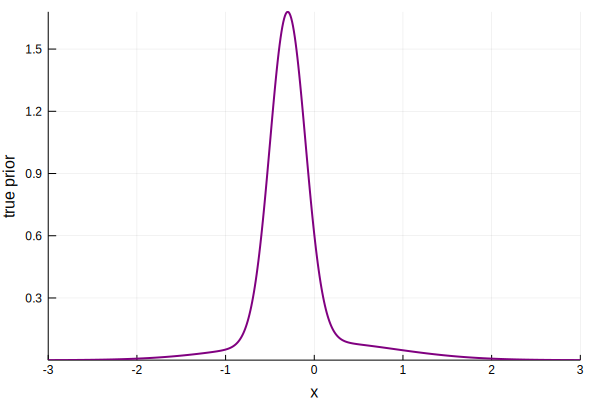

In [22]:
xs = collect(-3:0.01:3)
g_true = pdf.(true_dist, xs)
p1 = plot(xs, g_true, legend=:none,  linewidth=2, color=:purple, xlabel="x",ylabel="true prior")

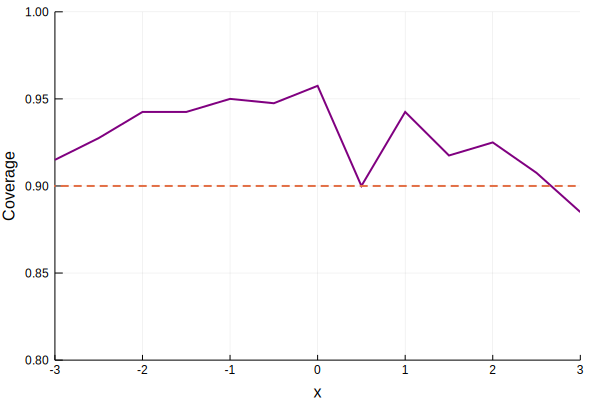

In [20]:
p2 = @df res_df_tmp plot(:x, :coverage, legend=:none, ylim=(0.8,1.0), linewidth=2, color=:purple,
       xlabel="x",ylabel="Coverage")
hline!(p2, [0.9], linestyle=:dash, linewidth=2)

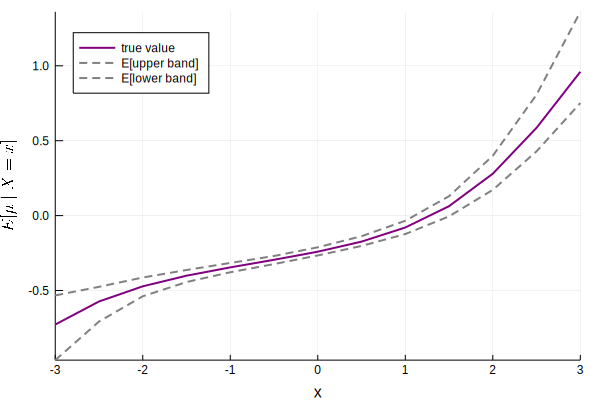

In [35]:
true_θ = [posterior_stats(d_true,PosteriorTarget(PosteriorMeanNumerator(x)))[3] for x in xs];
p3 = @df res_df_tmp plot(:x, [:truetheta :upperband :lowerband ], 
                  linewidth=2,
                  color=:purple, xlabel="x", 
                  linestyle=[:solid :dash :dash], color=[:purple :grey :grey],
                  labels=["true value" "E[upper band]"  "E[lower band]"],
                  ylabel=L"E[ \mu \mid X=x]",
                  legend=:topleft)

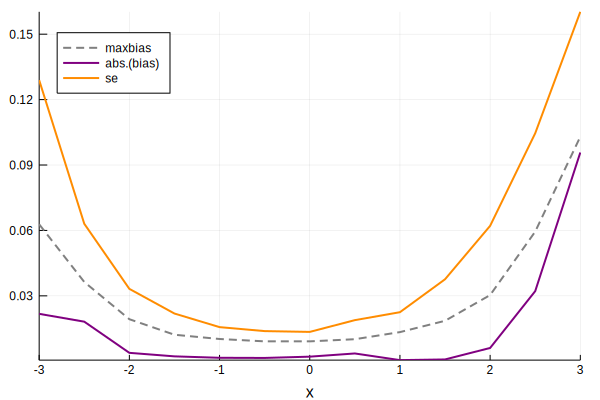

In [38]:
p4 = @df res_df_tmp plot(:x, [:maxbias abs.(:bias) :se],   linewidth=2,
          linestyle=[:dash :solid :solid], color=[:grey :purple :darkorange], legend=:topleft,
          xlabel="x")

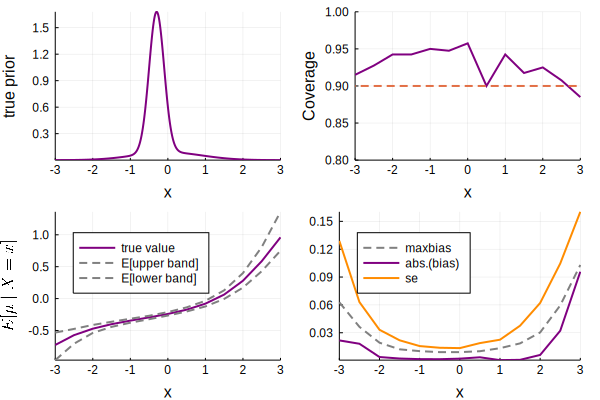

In [39]:
plot(p1,p2,p3, p4, layout=(2,2))

In [40]:
savefig("simulation_posterior_mean.pdf")